In [ ]:
### merge SAW_ST out put with cid reference

In [1]:
library(data.table)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#CID reference evaluation of IDH1
cidref = fread("/cluster/home/liuhengxin/P_Brain_tumer_fullscope/predata/T605_stereoseq/SS200000700TL_B4_raw_barcode_gene_exp_total_dedup_withan_IDH1.txt")
head(cidref)
length(unique(cidref$V1))

V1,V2,V3,V4
<chr>,<int>,<int>,<chr>
CGCCGTTGAAACGCTGCAGATGTTT,13463,21991,ENSG00000138413
AGTGACAAGTTCGTGCTCTCTATCA,13858,12533,ENSG00000138413
CCGTGCGACTTTCGTACCGCTTTCC,14570,21107,ENSG00000138413
CATCCCAATCGACTTTGAGTACCGA,9353,22058,ENSG00000138413
ACGATGCATCATACTTGAAAGATTC,7946,9522,ENSG00000138413
GCCCGCGAAAAATACGACTTTATTA,11359,8510,ENSG00000138413


[1] 2258

In [3]:
#build cid mapping input data
outres = fread("/cluster/home/liuhengxin/P_Brain_tumer_fullscope/predata/T605_stereoseq/SS200000700TL_B4_raw_barcode_gene_exp_total.txt")
head(outres)
colnames(outres) = c("x","y","geneID","MIDIndex","readCount")
nrow(outres)
outres = unique(outres[,c("x","y","geneID")])
nrow(outres)
fwrite(outres,file = "SS200000700TL_B4_raw_barcode_gene_exp_total_dedup.txt",quote = F,sep = "\t")
refdf = fread("/cluster/home/liuhengxin/P_Brain_tumer_fullscope/refdata/T605/IDH1_stereo_seq/barcode/SS200000700TL_B4.barcodeToPos.txt")
head(refdf)
colnames(refdf) = c("cidseq","x","y")
outres$cidpos = paste0(outres$x,"_",outres$y)
refdf$cidpos = paste0(refdf$x,"_",refdf$y)
outres$cidseq = refdf[match(outres$cidpos,refdf$cidpos),]$cidseq
outres = outres[,c("cidseq","x","y","geneID")]
#fwrite(outres,file = "/cluster/home/liuhengxin/P_Brain_tumer_fullscope/refdata/T605/IDH1_stereo_seq/barcode/SS200000700TL_B4_raw_barcode_gene_exp_total_dedup_withan.txt",quote = F,sep = "\t")
outresf = outres[outres$geneID == "ENSG00000138413",]
#fwrite(outresf,file = "/cluster/home/liuhengxin/P_Brain_tumer_fullscope/refdata/T605/IDH1_stereo_seq/barcode/SS200000700TL_B4_raw_barcode_gene_exp_total_dedup_withan_IDH1.txt",quote = F,sep = "\t")
fwrite(outresf,file = "/cluster/home/liuhengxin/P_Brain_tumer_fullscope/predata/T605_stereoseq/SS200000700TL_B4_raw_barcode_gene_exp_total_dedup_withan_IDH1.txt",quote = F,sep = "\t",col.names = F)
fwrite(outres,file = "/cluster/home/liuhengxin/P_Brain_tumer_fullscope/predata/T605_stereoseq/SS200000700TL_B4_raw_barcode_gene_exp_total_dedup_withan.txt",quote = F,sep = "\t",col.names = F)

x,y,geneID,MIDIndex,readCount
<chr>,<chr>,<chr>,<chr>,<chr>
19506,13150,ENSG00000292362,698646,1
11364,19835,ENSG00000292362,343394,1
7165,11860,ENSG00000292360,1032342,2
8138,14358,ENSG00000292348,991955,1
19623,23050,ENSG00000292347,470512,1
21625,10254,ENSG00000292338,512438,2


In [32]:
#result analysis
cidmpdf = read.delim("/cluster/home/liuhengxin/P_Brain_tumer_fullscope/predata/TB2001AFDD011_1/CID_mapping_IDH1.out")
head(cidmpdf)
cidmpdf.fil = cidmpdf[cidmpdf$editDi < 5,]
nrow(cidmpdf)
nrow(cidmpdf.fil)
fwrite(cidmpdf.fil,file = "/cluster/home/liuhengxin/P_Brain_tumer_fullscope/predata/TB2001AFDD011_1/CID_mapping_IDH1_fil.out",quote = F,sep = "\t")

[1] 6762

[1] 4527

In [ ]:
4527/27000

In [43]:
cidmpdf.fil = cidmpdf.fil[order(cidmpdf.fil$targetSeq),]
cidmpdf.fil
length(unique(cidmpdf.fil$cidPos))

,readid,querySeq,cidPos,targetSeq,editDi,gene,strand,time,kmtime,kmsize
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
218,TB2001AFDD011_3_819_4561_106015178_15829_3_12.22,AACGTGAGCATTAAGGACGTGGTTT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,3,ENSG00000138413,+,0.000095,0.000058,3
308,TB2001AFDD011_3_270_6137_85496648_16400_3_10.65,GAAACGGAGTATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,3,ENSG00000138413,+,0.000097,0.000059,4
506,TB2001AFDD011_1_46_729_10484650_15436_1_11.13,GAAACGTGAGCATTAAGGACGTGTG,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,2,ENSG00000138413,+,0.000132,0.000070,5
1445,TB2001AFDD011_5_520_8438_145839554_19363_1_12.18,AAACGGAGCATTAAGGACGTGTGTT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,2,ENSG00000138413,+,0.000109,0.000074,2
1558,TB2001AFDD011_4_700_4396_112602366_18848_0_13.48,AAACGTGAGCATTAAGGACGTGTCT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,1,ENSG00000138413,+,0.000129,0.000069,4
2054,TB2001AFDD011_2_971_3443_55230594_18806_0_11.25,AAACGTGAGCGTGGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,4,ENSG00000138413,+,0.000205,0.000098,5
2063,TB2001AFDD011_4_417_3699_117169599_12201_0_9.48,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,0.000007,0.000000,0
2111,TB2001AFDD011_1_571_1842_27642319_19244_1_10.10,AAACGTGAGCGATAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,2,ENSG00000138413,+,0.000173,0.000074,7
2183,TB2001AFDD011_1_415_2114_32285026_18285_1_10.49,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,0.000005,0.000000,0


[1] 22

In [83]:
table(cidmpdf.fil$editDi)
cidmpdf.fil[cidmpdf.fil$editDi == 0,]


   0    1    2    3    4 
1642  993  929  541  422 

,readid,querySeq,cidPos,targetSeq,editDi,gene,strand,time,kmtime,kmsize
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
2063,TB2001AFDD011_4_417_3699_117169599_12201_0_9.48,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,7e-06,0,0
2183,TB2001AFDD011_1_415_2114_32285026_18285_1_10.49,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,5e-06,0,0
4352,TB2001AFDD011_2_82_3598_49594960_16707_2_12.44,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,4e-06,0,0
4593,TB2001AFDD011_3_143_6423_96132206_19782_2_11.98,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,4e-06,0,0
4914,TB2001AFDD011_1_449_7_99566_14997_1_10.56,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,5e-06,0,0
5037,TB2001AFDD011_2_939_3538_55103884_16187_2_10.85,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,4e-06,0,0
5161,TB2001AFDD011_3_755_3786_96037860_10661_3_13.09,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,5e-06,0,0
5419,TB2001AFDD011_1_567_566_7696861_11905_1_12.93,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,1e-05,0,0
5456,TB2001AFDD011_1_289_1824_25022112_12354_1_12.13,AAACGTGAGCATTAAGGACGTGTGT,18617_20237,AAACGTGAGCATTAAGGACGTGTGT,0,ENSG00000138413,+,9e-06,0,0


In [36]:
stan = fread("/cluster/home/liuhengxin/P_Brain_tumer_fullscope/refdata/T605/IDH1_stereo_seq/matrix/total_gene_T605_human_f001_2D_20220831-human.txt.gz")
head(stan)

gene,x,y,umi_count,cell_label,region_id
<chr>,<int>,<int>,<int>,<int>,<int>
AC136352.4,12443,9955,2,0,0
AC136352.4,22454,8872,1,0,0
AC136352.4,15503,15211,1,0,0
AC136352.4,8855,14272,3,0,0
AC136352.4,15163,1986,1,0,0
AC136352.4,12063,8413,1,0,0


In [66]:
stan.uq = unique(stan[,c("x","y","cell_label","region_id")])
nrow(stan.uq)

[1] 83376463

In [85]:
stan.idh1 = stan[stan$gene == "IDH1",]
stan.idh1 = unique(stan.idh1[,c("x","y","cell_label","region_id")])
nrow(stan.idh1)
stan.idh1$cidPos = paste0(stan.idh1$x, "_", stan.idh1$y)
intersect(stan.idh1$cidPos,cidmpdf.fil$cidPos)

[1] 2059

character(0)

x,y,geneID,MIDIndex,readCount
<int>,<int>,<chr>,<int>,<int>
19506,13150,ENSG00000292362,698646,1
11364,19835,ENSG00000292362,343394,1
7165,11860,ENSG00000292360,1032342,2
8138,14358,ENSG00000292348,991955,1
19623,23050,ENSG00000292347,470512,1
21625,10254,ENSG00000292338,512438,2


character(0)

[1] "19506_13150" "11364_19835" "7165_11860"  "8138_14358"  "19623_23050"
[6] "21625_10254"

[1] "9617_5430"   "11237_4384"  "8667_3541"   "20493_12567" "8410_3424"  
[6] "20027_9189"

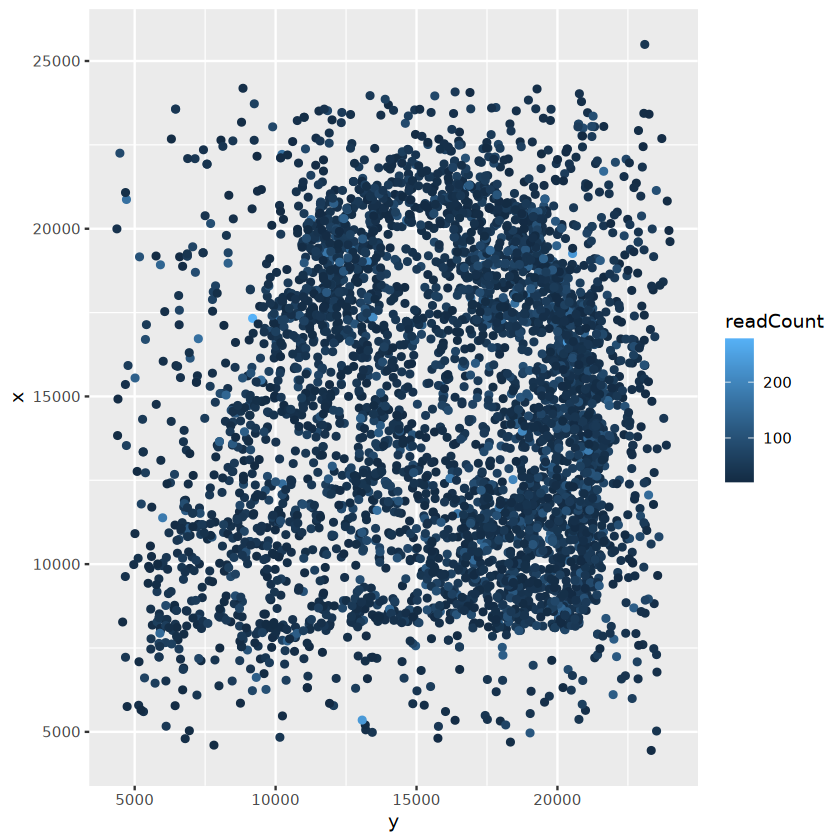

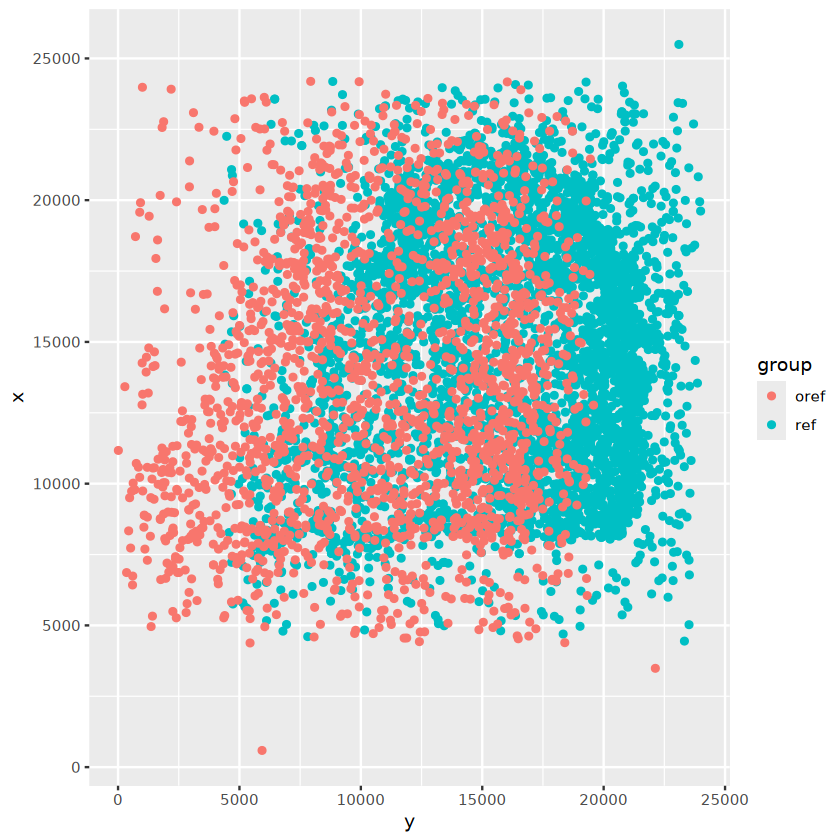

In [108]:
tgdf = fread("/cluster/home/liuhengxin/P_Brain_tumer_fullscope/predata/T605_stereoseq/SS200000700TL_B4_raw_barcode_gene_exp_total_downsample.txt")
head(tgdf)
tgdf$cidPos = paste0(tgdf$x,"_",tgdf$y)
intersect(stan.idh1$cidPos,tgdf$cidPos)
head(tgdf$cidPos)
head(stan.idh1$cidPos)
tgdf$group = "ref"
stan.idh1$group = "oref"
tmp = rbind(tgdf[tgdf$readCount > 20,c("x","y","group")],stan.idh1[,c("x","y","group")])
ggplot(tgdf[tgdf$readCount > 20,],aes(x = x, y = y,color = readCount)) + geom_point() + coord_flip()
ggplot(tmp,aes(x = x, y = y,color = group)) + geom_point() + coord_flip()
#ggplot(stan.uqds,aes(x = x, y = y,color = label)) + geom_point()

In [ ]:
intersect(stan.idh1$cidPos,tgdf$cidPos)

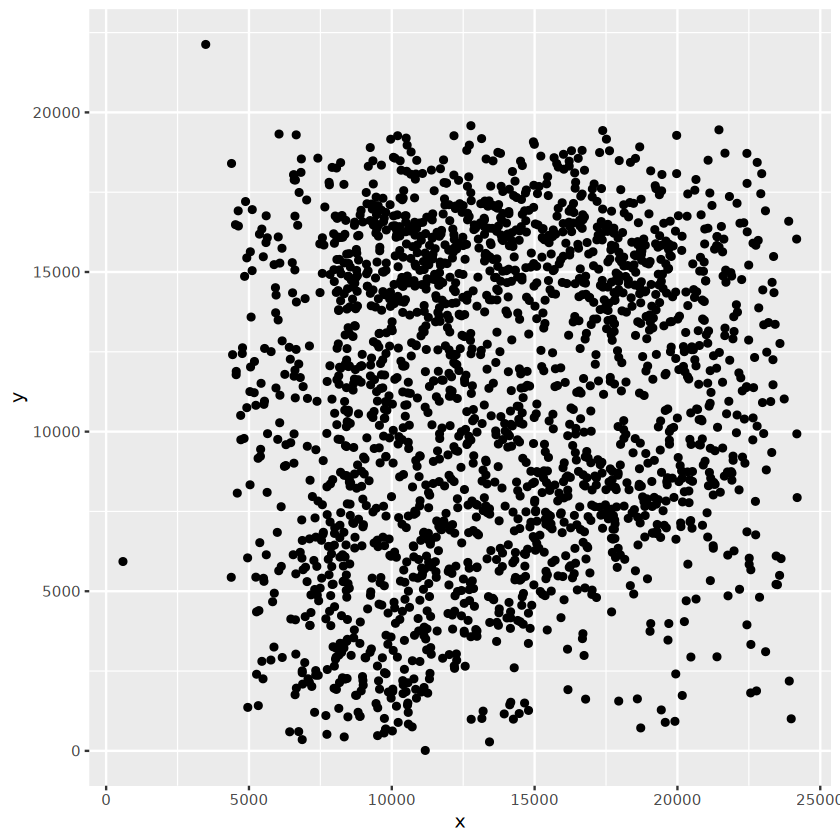

In [80]:
ggplot(stan[stan$gene == "IDH1",],aes(x = x, y = y)) + geom_point()

cell_label,x,y,region_id,cell_type,new_cell_type,tumor_level,label,cidPos
<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
36,6657,6059,0,Oligo,Oligo|tumor_cluster_1,8,tumor_cluster_1,_
74,6844,5693,0,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1,_
77,6872,6088,0,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1,_
90,6927,5698,0,Unknown_glial,Unknown_glial|tumor_cluster_2,8,tumor_cluster_2,_
91,6947,5225,0,Oligo,Oligo|glial,8,glial,_
91,6927,5224,0,Oligo,Oligo|glial,8,glial,_


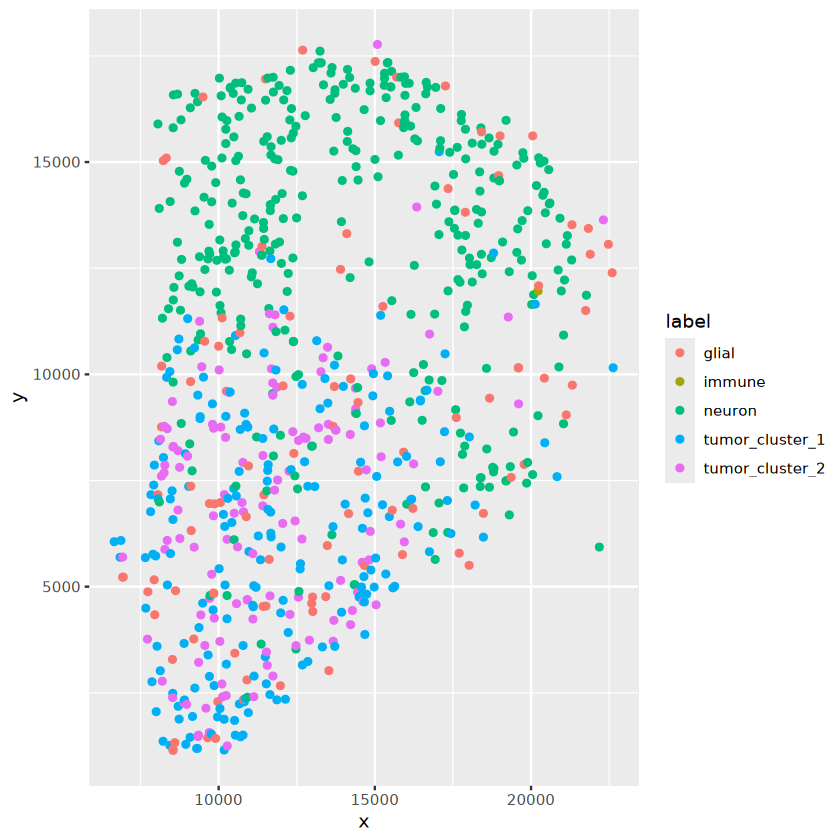

In [77]:
stan.uqds = stan.uq[sample(1:nrow(stan.uq),size = 10000),]
stan.uqds = merge(stan.uqds,metaan,by.y = "cells",by.x = "cell_label")
head(stan.uqds)
library(ggplot2)
ggplot(stan.uqds,aes(x = x, y = y,color = label)) + geom_point()

In [78]:
table(cidmpdf.fil.snp[,c("cidPos")])

[1] "8665_11425"  "18278_11581" "8424_9113"   "16210_22772" "10624_20719"
 [6] "13740_21412" "14863_19454" "10811_18858" "18713_17689" "20337_21047"
[11] "16230_20734" "17186_21512" "14679_21775"

In [37]:
stan.hub = stan[stan$gene == "IDH1",]
nrow(stan.hub)

[1] 2059

In [39]:
head(stan.hub)
metaan = fread("/cluster/home/liuhengxin/P_Brain_tumer_fullscope/refdata/T605/IDH1_stereo_seq/T605_meta.txt")
head(metaan)

gene,x,y,umi_count,cell_label,region_id
<chr>,<int>,<int>,<int>,<int>,<int>
IDH1,9617,5430,1,3943,0
IDH1,11237,4384,1,0,0
IDH1,8667,3541,1,1956,0
IDH1,20493,12567,1,17203,0
IDH1,8410,3424,1,1344,0
IDH1,20027,9189,1,0,0


cells,cell_type,new_cell_type,tumor_level,label
<int>,<chr>,<chr>,<int>,<chr>
8,Astro,Astro|tumor_cluster_1,1,tumor_cluster_1
10,Unknown_glial,Unknown_glial|tumor_cluster_2,8,tumor_cluster_2
11,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1
12,Opc,Opc|tumor_cluster_1,9,tumor_cluster_1
13,Astro,Astro|tumor_cluster_2,9,tumor_cluster_2
14,Unknown_glial,Unknown_glial|tumor_cluster_1,9,tumor_cluster_1


In [45]:
stan.hub = merge(stan.hub,metaan,by.y = "cells",by.x = "cell_label")
stan.hub

cell_label,gene,x,y,umi_count,region_id,cell_type.x,new_cell_type.x,tumor_level.x,label.x,cell_type.y,new_cell_type.y,tumor_level.y,label.y
<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
72,IDH1,6854,6037,1,0,Oligo,Oligo|tumor_cluster_1,8,tumor_cluster_1,Oligo,Oligo|tumor_cluster_1,8,tumor_cluster_1
127,IDH1,7393,4874,1,0,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1
145,IDH1,7493,5097,2,0,Opc,Opc|tumor_cluster_2,9,tumor_cluster_2,Opc,Opc|tumor_cluster_2,9,tumor_cluster_2
244,IDH1,7692,4137,1,0,Unknown_glial,AC_Astro|glial,9,glial,Unknown_glial,AC_Astro|glial,9,glial
343,IDH1,7781,6404,1,0,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1
493,IDH1,7946,5222,1,0,Opc,Opc|tumor_cluster_2,9,tumor_cluster_2,Opc,Opc|tumor_cluster_2,9,tumor_cluster_2
536,IDH1,7997,4516,1,0,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1
540,IDH1,7990,6445,1,0,Unknown_glial,Unknown_glial|tumor_cluster_1,9,tumor_cluster_1,Unknown_glial,Unknown_glial|tumor_cluster_1,9,tumor_cluster_1
547,IDH1,7980,1961,1,0,Opc,Opc|tumor_cluster_2,9,tumor_cluster_2,Opc,Opc|tumor_cluster_2,9,tumor_cluster_2


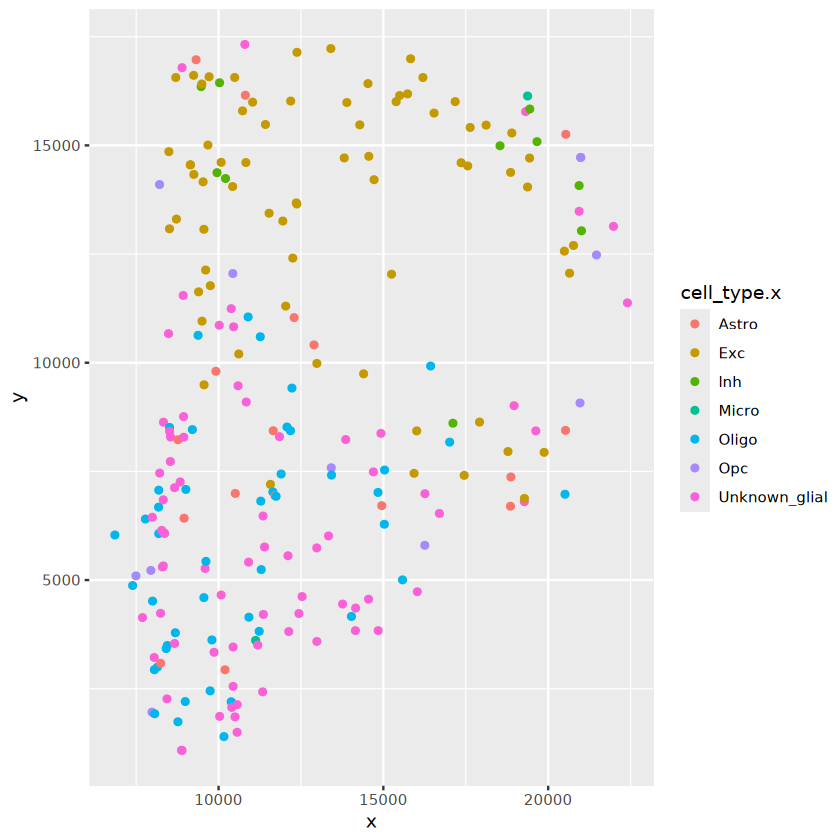

In [70]:
ggplot(stan.hub,aes(x = x, y = y,color = cell_type.x)) + geom_point()

In [48]:
#snp call
snpdf = fread("/cluster/home/liuhengxin/P_Brain_tumer_fullscope/predata/TB2001AFDD011_1/IDH1_enrich_full_sam_snp_rs11554137.txt.fil",header = F)
head(snpdf)

Warning message in fread("/cluster/home/liuhengxin/P_Brain_tumer_fullscope/predata/TB2001AFDD011_1/IDH1_enrich_full_sam_snp_rs11554137.txt.fil", :
“Found and resolved improper quoting out-of-sample. First healed line 1017: <<IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_2_665_3219_62769436_12856_2_11.58	0	60	chr2	7	T	"	208248468	G	S>>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning.”


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_2_397_1109_55493802_41509_3_8.43,16,60,chr2,.,.,.,208248468,G,D
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_1_837_1876_24892453_33882_1_12.30,16,60,chr2,1638,C,#,208248468,G,S
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_4_956_7757_132268502_134065_0_8.36,16,53,chr2,4843,A,-,208248468,G,M
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_3_575_6267_98965868_24562_3_8.61,0,60,chr2,.,.,.,208248468,G,D
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_4_762_7244_134658253_40562_2_8.92,0,60,chr2,.,.,.,208248468,G,D
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_1_662_271_3604705_45368_1_9.62,16,60,chr2,2712,A,5,208248468,G,M


In [53]:
nrow(snpdf[snpdf$V6 == "A",])
snpdf$readid = substr(snpdf$V1,34,nchar(snpdf$V1))
head(snpdf)
table(snpdf$V6)

[1] 598

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,readid
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_2_397_1109_55493802_41509_3_8.43,16,60,chr2,.,.,.,208248468,G,D,TB2001AFDD011_2_397_1109_55493802_41509_3_8.43
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_1_837_1876_24892453_33882_1_12.30,16,60,chr2,1638,C,#,208248468,G,S,TB2001AFDD011_1_837_1876_24892453_33882_1_12.30
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_4_956_7757_132268502_134065_0_8.36,16,53,chr2,4843,A,-,208248468,G,M,TB2001AFDD011_4_956_7757_132268502_134065_0_8.36
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_3_575_6267_98965868_24562_3_8.61,0,60,chr2,.,.,.,208248468,G,D,TB2001AFDD011_3_575_6267_98965868_24562_3_8.61
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_4_762_7244_134658253_40562_2_8.92,0,60,chr2,.,.,.,208248468,G,D,TB2001AFDD011_4_762_7244_134658253_40562_2_8.92
IDH1_enrich_full_sam_snp.txt.fil:TB2001AFDD011_1_662_271_3604705_45368_1_9.62,16,60,chr2,2712,A,5,208248468,G,M,TB2001AFDD011_1_662_271_3604705_45368_1_9.62



  .   A   C   T 
802 598 222 233 

In [82]:
nrow(cidmpdf.fil)
cidmpdf.fil.snp = merge(cidmpdf.fil,snpdf[,c("readid","V6")],by.x = "readid",by.y = "readid")
table(cidmpdf.fil.snp[,c("V6","cidPos")])
nrow(cidmpdf.fil.snp)
head(cidmpdf.fil.snp)

[1] 4527

   cidPos
V6  10624_20719 10811_18858 13740_21412 14679_21775 14863_19454 16210_22772
  .           2           2          17           1          12           2
  A           2           4          21           1           9           5
  C           0           0           0           1           2           0
  T           0           2           4           0           1           1
   cidPos
V6  16230_20734 17186_21512 17759_11670 18278_11581 18713_17689 19330_12169
  .           2          19           3           4           3           2
  A           4          30           0          13           3           0
  C           0           0           0           0           0           0
  T           0           4           0           2           2           0
   cidPos
V6  20337_21047 8424_9113 8665_11425 8925_21232 9472_20652
  .           9         0          0          4          4
  A           7         1         29          0          0
  C           0         0        

[1] 271

,readid,querySeq,cidPos,targetSeq,editDi,gene,strand,time,kmtime,kmsize,V6
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>
1,TB2001AFDD011_1_1020_2225_33854251_33662_1_13.49,TGATACACAGAGGTGTATTCAGCGT,17186_21512,TGATACACAGAGGTGTATTCAGCGT,0,ENSG00000138413,+,4.0e-06,0.0e+00,0,A
2,TB2001AFDD011_1_124_791_11583958_34597_1_12.73,TGATACCACAGAGGTGTATTCAGCGT,17186_21512,TGATACACAGAGGTGTATTCAGCGT,1,ENSG00000138413,+,6.8e-05,5.4e-05,1,A
3,TB2001AFDD011_1_146_264_4004547_13572_2_9.35,AAGACTACTGCATCCTTCCTCACCC,8665_11425,AAGACTACTGCATCCTTCCTCACCC,0,ENSG00000138413,+,9.0e-06,0.0e+00,0,A
4,TB2001AFDD011_1_159_342_4736322_12004_1_11.96,TCATAATCAAACAGACCGCCCAGCT,17759_11670,TCATAATCAAATGACCGCCCAGCTT,3,ENSG00000138413,+,8.7e-05,7.1e-05,1,.
5,TB2001AFDD011_1_26_717_10164328_35136_1_13.87,CGTTCTCCTCCTGTTCCATAGCTAA,13740_21412,CGTTCTCCTCCTGTTCCATAGCTAA,0,ENSG00000138413,+,7.0e-06,0.0e+00,0,A
6,TB2001AFDD011_1_309_346_4884168_31796_0_12.02,CGTTCTCCTCCTGTTCCATAGCTAA,13740_21412,CGTTCTCCTCCTGTTCCATAGCTAA,0,ENSG00000138413,+,7.0e-06,0.0e+00,0,A


In [61]:
head(stan.hub)

cell_label,gene,x,y,umi_count,region_id,cell_type.x,new_cell_type.x,tumor_level.x,label.x,cell_type.y,new_cell_type.y,tumor_level.y,label.y,cidPos
<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
72,IDH1,6854,6037,1,0,Oligo,Oligo|tumor_cluster_1,8,tumor_cluster_1,Oligo,Oligo|tumor_cluster_1,8,tumor_cluster_1,6854_6037
127,IDH1,7393,4874,1,0,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1,7393_4874
145,IDH1,7493,5097,2,0,Opc,Opc|tumor_cluster_2,9,tumor_cluster_2,Opc,Opc|tumor_cluster_2,9,tumor_cluster_2,7493_5097
244,IDH1,7692,4137,1,0,Unknown_glial,AC_Astro|glial,9,glial,Unknown_glial,AC_Astro|glial,9,glial,7692_4137
343,IDH1,7781,6404,1,0,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1,Oligo,Oligo|tumor_cluster_1,9,tumor_cluster_1,7781_6404
493,IDH1,7946,5222,1,0,Opc,Opc|tumor_cluster_2,9,tumor_cluster_2,Opc,Opc|tumor_cluster_2,9,tumor_cluster_2,7946_5222


In [63]:
stan$cidPos = paste0(stan$x,"_",stan$y)
resdf = stan[stan$cidPos %in% cidmpdf.fil.snp$cidPos,]
resdf

gene,x,y,umi_count,cell_label,region_id,cidPos
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
MT-ND4,8424,9113,4,0,0,8424_9113
